In [1]:
# !pip install Pandas 
import pandas as pd
import numpy as np

In [2]:
df_arCar= pd.read_csv("data/anal_report_title_car.csv", encoding="cp949")

In [3]:
df=df_arCar.loc[:,['code','coname','house','analyst','carm','yy','mm','dd','title']]

In [4]:
print(df.head())
df.tail()

    code coname    house analyst          carm      yy    mm    dd title
0  15940  LG데이콤  KTB투자증권     송재경  -0.043824253  2009.0  12.0   2.0   NaN
1  49070    인탑스  LIG투자증권     김갑호  0.0487471867  2009.0  12.0  15.0   NaN
2  49520   유아이엘  LIG투자증권     김갑호  0.0849471867  2009.0  12.0  15.0   NaN
3  54340    피앤텔  LIG투자증권     김갑호  -0.000152813  2009.0  12.0  15.0   NaN
4  68790    DMS  LIG투자증권     김영준  -0.030058153  2009.0   9.0  22.0   NaN


,code,coname,house,analyst,carm,yy,mm,dd,title
44616,97230,한진중공업,삼성증권,한영수,-0.039736673,2014.0,2.0,28.0,한진중공업-이익개선 기대감 vs 이익전망을 변경시킬 수 있는 요소들
44617,55550,신한지주,KB투자증권,유승창,-0.003910137,2015.0,10.0,22.0,신한지주-이익 안정성 및 배당수익률 상승 기대감 유효
44618,33660,아주캐피탈,삼성증권,김재우,0.0130434491,2016.0,11.0,16.0,아주캐피탈-3Q review-이익 안정성 매력적이나 중장기적 시장 입지 강화 필요
44619,120,CJ대한통운,키움증권,조병희,-0.016607077,2018.0,1.0,3.0,"CJ대한통운-낮아진 기대감, 이익 증가 확인 이후 반등 기대"
44620,120,CJ대한통운,HMC투자증권,김정은,-0.040710288,2011.0,3.0,30.0,"대한통운-안정적 이익 성장세 + M&A 프리미엄, 운송업종 최선호주 추천"


## Title NaN제거 

In [5]:
df.dropna(subset=['title'], inplace=True)
df.head()

,code,coname,house,analyst,carm,yy,mm,dd,title
4548,810,삼성화재,LIG투자증권,지태현,0.0271759782,2010.0,4.0,26.0,"손해보험-손해율 고민은 그만, 지속성장과 삼성생명 상장을 즐기자"
4549,2550,KB손해보험,대신증권,강승건,0.0114572025,2013.0,3.0,4.0,"LIG손해보험-핵심 지표 흐름은 양호,신계약비 추가 상각 우려가 부담"
4550,2550,KB손해보험,대신증권,강승건,0.0114572025,2013.0,3.0,4.0,"LIG손해보험-핵심 지표 흐름은 양호,신계약비 추가 상각 우려가 부담"
4551,175330,JB금융지주,교보증권,황석규,-0.011093044,2015.0,11.0,26.0,JB금융-두 가지 우려가 기 반영된 주가. 그러나 우려는 우려에 불과
4552,10130,고려아연,신한금융투자,박광래,-0.008293044,2015.0,11.0,26.0,고려아연-아연 수요 부진에 대한 우려는 지나치다


In [18]:
df.isnull().sum()
# df.info()
df.dropna(how='any', inplace = True) # 결측치값이 하나라도 있는 행은 모두 삭제 
df.isnull

<bound method DataFrame.isnull of          code  coname    house analyst          carm      yy    mm    dd  \
4548      810    삼성화재  LIG투자증권     지태현  0.0271759782  2010.0   4.0  26.0   
4549     2550  KB손해보험     대신증권     강승건  0.0114572025  2013.0   3.0   4.0   
4550     2550  KB손해보험     대신증권     강승건  0.0114572025  2013.0   3.0   4.0   
4551   175330  JB금융지주     교보증권     황석규  -0.011093044  2015.0  11.0  26.0   
4552    10130    고려아연   신한금융투자     박광래  -0.008293044  2015.0  11.0  26.0   
...       ...     ...      ...     ...           ...     ...   ...   ...   
44616   97230   한진중공업     삼성증권     한영수  -0.039736673  2014.0   2.0  28.0   
44617   55550    신한지주   KB투자증권     유승창  -0.003910137  2015.0  10.0  22.0   
44618   33660   아주캐피탈     삼성증권     김재우  0.0130434491  2016.0  11.0  16.0   
44619     120  CJ대한통운     키움증권     조병희  -0.016607077  2018.0   1.0   3.0   
44620     120  CJ대한통운  HMC투자증권     김정은  -0.040710288  2011.0   3.0  30.0   

                                               title 

## Type_error 제거
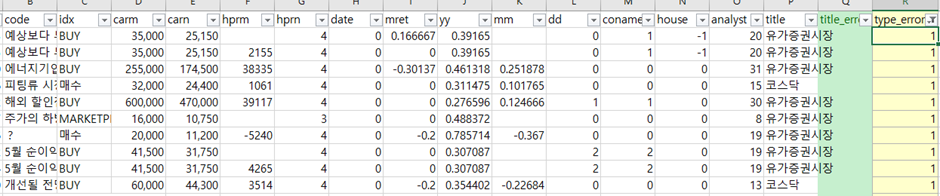

In [32]:
# type_error=df[type(df['code'])=="object"]
# type(df['code'])=="object"
a = df.astype({'code':'int'})

ValueError: invalid literal for int() with base 10: '에너지기업으로서의 매력 부각되며 지속적인'

## title에 기업명만 들어간 경우 제거 


In [51]:
# Toy: title에서 `NaN제거 
mydf=pd.DataFrame({'idx':[1,2,"?",4,"이상치"],
                 'ex':["NaN",'음','글쎄','이게',"NaN"]})
# A = mydf[mydf['ex'] == 'NaN'].index 
#'title'이 'NaN'인 행들을 모두 삭제하려면 먼저 이 행들의 index 번호를 알아야 한다. 
# column 값들은 모두 index를 축으로 정렬되어 있기 때문이다.
# mydf.drop(A,axis='index',inplace=True) 
# 이제 A를 drop 함수에 적용하려면 axis를 index로 걸어서 해야 한다. 
# A가 'All'들의 index 번호를 보유하고 있기 때문이다
print(mydf)
# mydf.dtypes

# newdf = mydf.loc[ mydf['idx'].str.contains(pat=[^0-9]), ]
# 힌트: df = df.loc[df['idx'].str.contains(pat=[^0-9]), ]      

# newdf
print( mydf[mydf['idx'].str.contains(pat=[0-9])] ) # str.contains() 부분일치하는 값을 찾음

   idx   ex
0    1  NaN
1    2    음
2    ?   글쎄
3    4   이게
4  이상치  NaN


TypeError: unhashable type: 'list'

,code,title
1,2,음
2,3,글쎄
3,4,이게
